# **MLFlow: Unified Platform for Experiment Tracking and Model Registry**

MLflow is an open-source platform for managing the end-to-end machine learning lifecycle. It provides a suite of tools and components designed to streamline the development, experimentation, productionization, and collaboration aspects of machine learning projects. MLflow is widely used by data scientists, machine learning engineers, and researchers to track experiments, package and share code, and deploy models at scale.

## **Key Features:**
1. Experiment Tracking
2. Model Registry

## **Loading the Data**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
## nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import mlflow.sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
import joblib
from joblib import Memory
import os
from sklearn.metrics import accuracy_score

In [2]:
yonex = pd.read_csv(r"C:\Users\ASUS\Documents\Innomatics Jupyter notebooks\Data Science Internship\Tasks\Sentiment Analysis on Flipkart Products\yonex.csv")

In [3]:
yonex

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,nice product good quality price rising bad sig...,4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,it supplied one davis outside cover one ad ins...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,worst product damaged shuttlecocks packed new ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,Oct 2020,quite k nowadays quality corks like years back...,3
4,ASHIK P A,Over priced,"Certified Buyer, Bengaluru",147.0,24.0,Apr 2016,pricedjust retailer it understand wat advantag...,1
...,...,...,...,...,...,...,...,...
8503,darwin,Yones Mavis 350 Blue cap,"Certified Buyer, Bengaluru",2.0,0.0,Apr 2016,wrist duplicate produced it buy seller product...,1
8504,naresh g,For Mavis350,"Certified Buyer, Bengaluru",2.0,1.0,Aug 2016,received product intact sealedread,5
8505,MD. Jabbar,Very Good,"Certified Buyer, Bengaluru",1.0,0.0,Sep 2016,delivered time price high marketread,3
8506,Abani Behera,Don't waste your money,"Certified Buyer, Bengaluru",0.0,2.0,Sep 2016,mark available market less priceread,4


In [4]:
analyzer = SentimentIntensityAnalyzer()

In [5]:
def polarity(n):
    return analyzer.polarity_scores(n)['compound']

In [6]:
yonex['Emotion'] = yonex['Review text'].apply(polarity)

<Axes: >

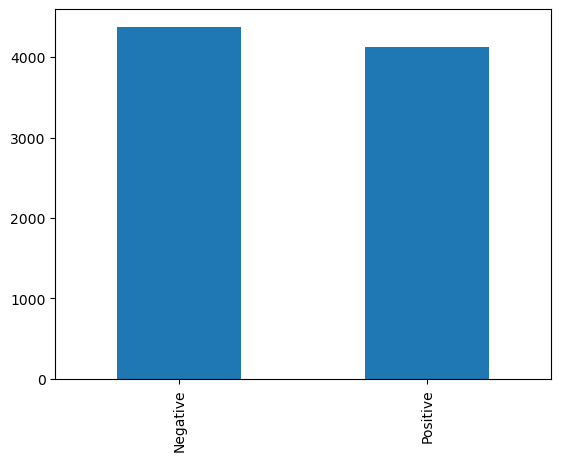

In [7]:
def sentiment(n):
    if n <= 0.3:
        return 'Negative'
    else:
        return 'Positive'
yonex['Emotion'] = yonex['Emotion'].apply(sentiment)
yonex['Emotion'].value_counts().plot(kind = 'bar')

In [8]:
df = pd.concat([yonex['Review text'],yonex['Emotion']],axis=1)

In [9]:
df

,Review text,Emotion
0,nice product good quality price rising bad sig...,Positive
1,it supplied one davis outside cover one ad ins...,Negative
2,worst product damaged shuttlecocks packed new ...,Negative
3,quite k nowadays quality corks like years back...,Positive
4,pricedjust retailer it understand wat advantag...,Negative
...,...,...
8503,wrist duplicate produced it buy seller product...,Negative
8504,received product intact sealedread,Negative
8505,delivered time price high marketread,Negative
8506,mark available market less priceread,Negative


In [12]:
#df.to_csv('df_yonex.csv',index=False)

In [10]:
X=df['Review text']
y=df['Emotion']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## **Auto Logging KNN Experiment Run using MLFlow**

In [28]:
#! pip install mlflow

In [12]:
import mlflow

mlflow.set_experiment("sentiment_analysis")

2024/03/28 11:12:22 INFO mlflow.tracking.fluent: Experiment with name 'sentiment_analysis' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/ASUS/Documents/Innomatics%20Jupyter%20notebooks/Data%20Science%20Internship/Tasks/MLFlow%20Task/mlruns/270206520674486399', creation_time=1711604542164, experiment_id='270206520674486399', last_update_time=1711604542164, lifecycle_stage='active', name='sentiment_analysis', tags={}>

In [15]:
pipelines = {
    'knn': Pipeline([
        ('Vectorization', CountVectorizer()),
        ('TF-IDF', TfidfTransformer()),
        ('Estimator',KNeighborsClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('Vectorization', CountVectorizer()),
        ('TF-IDF', TfidfTransformer()),
        ('Estimator', MultinomialNB())
    ]),
    'logistic_regression': Pipeline([
        ('Vectorization', CountVectorizer()),
        ('TF-IDF', TfidfTransformer()),
        ('Estimator', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('Vectorization', CountVectorizer()),
        ('TF-IDF', TfidfTransformer()),
        ('Estimator', RandomForestClassifier())
    ]),
    'svc': Pipeline([
        ('Vectorization', CountVectorizer()),
        ('TF-IDF', TfidfTransformer()),
        ('Estimator', SVC())
    ]),
    'decision_tree': Pipeline([
        ('Vectorization', CountVectorizer()),
        ('TF-IDF', TfidfTransformer()),
        ('Estimator', DecisionTreeClassifier())
    ])
}

# Define parameter grids for each algorithm
param_grids = {
    'knn': [
        {
            'Vectorization__min_df': [1, 2, 3],
            'Vectorization__max_df': [0.5, 0.7, 1.0],
            'Estimator__n_neighbors': [i for i in range(3, 21, 2)],
            'Estimator__p': [1, 2, 3]
        }
    ],
    'naive_bayes': [
        {
            'Vectorization__min_df': [1, 2, 3],
            'Vectorization__max_df': [0.5, 0.7, 1.0],
            'Estimator__alpha': [1, 2, 3]
        }
    ],
    'logistic_regression': [
        {
            'Vectorization__min_df': [1, 2, 3],
            'Vectorization__max_df': [0.5, 0.7, 1.0],
            'Estimator__C': [0.1, 1, 10],
            'Estimator__penalty': ['l1', 'l2']
        }
    ],
    'random_forest': [
        {
            'Vectorization__min_df': [1, 2, 3],
            'Vectorization__max_df': [0.5, 0.7, 1.0],
            'Estimator__n_estimators': [50, 100, 200]
        }
    ],
    'svc': [
        {
            'Vectorization__min_df': [1, 2, 3],
            'Vectorization__max_df': [0.5, 0.7, 1.0],
            'Estimator__kernel': ['linear', 'rbf'],
            'Estimator__C': [0.1, 1, 10]
        }
    ],
    'decision_tree': [
        {
            'Vectorization__min_df': [1, 2, 3],
            'Vectorization__max_df': [0.5, 0.7, 1.0],
            'Estimator__max_depth': [None, 5, 10]
        }
    ]
}

In [16]:
best_models = {}
# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()

2024/03/28 11:19:10 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


********** knn **********
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
CPU times: total: 14min 8s
Wall time: 6min 26s
Train Score:  0.8721197065025542
Test Score:  0.8692994828396803

********** naive_bayes **********


2024/03/28 11:25:38 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 21.8 s
Wall time: 41.2 s
Train Score:  0.9061250039890713
Test Score:  0.9045604137282558

********** logistic_regression **********


2024/03/28 11:26:20 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 29.5 s
Wall time: 51.6 s
Train Score:  0.9711635568276942
Test Score:  0.9774330042313117

********** random_forest **********


2024/03/28 11:27:12 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 5min 5s
Wall time: 5min 34s
Train Score:  0.9667750875754548
Test Score:  0.9699106723084157

********** svc **********


2024/03/28 11:32:47 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 6min 52s
Wall time: 10min 8s
Train Score:  0.9711641705309514
Test Score:  0.9769628584861307

********** decision_tree **********


2024/03/28 11:42:58 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 53.9 s
Wall time: 2min 37s
Train Score:  0.9684994709877923
Test Score:  0.9717912552891397



In [39]:
# Stop the auto logger

mlflow.sklearn.autolog(disable=True)

# Machine Learning Workflow Orchestration

In [17]:
df=pd.read_csv('df_yonex.csv')

In [18]:
df

,Review text,Emotion
0,nice product good quality price rising bad sig...,Positive
1,it supplied one davis outside cover one ad ins...,Negative
2,worst product damaged shuttlecocks packed new ...,Negative
3,quite k nowadays quality corks like years back...,Positive
4,pricedjust retailer it understand wat advantag...,Negative
...,...,...
8503,wrist duplicate produced it buy seller product...,Negative
8504,received product intact sealedread,Negative
8505,delivered time price high marketread,Negative
8506,mark available market less priceread,Negative


In [16]:
#vector = CountVectorizer()
#vector.fit_transform(df['Review text']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
def load_data(file_path):
    """
    Load data from a CSV file.
    """
    return pd.read_csv(file_path)

def split_inputs_output(data, inputs, output):
    """
    Split features and target variables.
    """
    X = data[inputs]
    y = data[output]
    return X, y

def split_train_test(X, y, test_size=0.25, random_state=0):
    """
    Split data into train and test sets.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def apply_vectorizers(X_train, X_test):
    count_pipeline = Pipeline([
        ('vectorizer', CountVectorizer()),
    ])

    X_train = count_pipeline.fit_transform(X_train)

    X_test = count_pipeline.transform(X_test)
    
    return X_train, X_test

def train_model(X_train, y_train, hyperparameters,algorithm):
    """
    Training the machine learning model.
    """
    if 'knn' in algorithm.lower():
        knn = KNeighborsClassifier(**hyperparameters)
        knn.fit(X_train, y_train)
        return knn
    
    elif 'svc' in algorithm.lower():
        svc = SVC(**hyperparameters)
        svc.fit(X_train,y_train)
        return svc
    
    elif 'log' in algorithm.lower():
        log = LogisticRegression(**hyperparameters)
        log.fit(X_train, y_train)
        return log
    
    elif 'random' in algorithm.lower():
        ran = RandomForestClassifier(**hyperparameters)
        ran.fit(X_train,y_train)
        return ran
    
    elif 'decision' in algorithm.lower():
        dt = DecisionTreeClassifier(**hyperparameters)
        dt.fit(X_train,y_train)
        return dt
    
    elif 'naive' in algorithm.lower():
        nb = MultinomialNB(**hyperparameters)
        nb.fit(X_train,y_train)
        return nb
    
    else:
        raise ValueError('Please pass a valid algorithm')
        
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluating the model.
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)

    return train_score, test_score       

In [33]:
def workflow(data_path):
    DATA_PATH = data_path
    INPUTS = 'Review text'
    OUTPUT = 'Emotion'
    algorithm = input("Enter the Algorithm:")
    if 'knn' in algorithm.lower():
        HYPERPARAMETERS = {'n_neighbors': 3, 'p': 2}
    elif 'svc' in algorithm.lower():
        HYPERPARAMETERS = {'C': 2, 'kernel': 3,}
    elif 'log' in algorithm.lower():
        HYPERPARAMETERS = {'C':1.0, 'penalty':'l2'}
    elif 'random' in algorithm.lower():
        HYPERPARAMETERS = {'n_estimators':100}
    elif 'decision' in algorithm.lower():
        HYPERPARAMETERS = {'max_depth':None}  
    elif 'naive' in algorithm.lower():
        HYPERPARAMETERS = {'alpha':1.0}
        
    
    # Load data
    pref = load_data(DATA_PATH)

    # Identify Inputs and Output
    X, y = split_inputs_output(pref, INPUTS, OUTPUT)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = split_train_test(X, y)

    # Preprocess the data
    X_train, X_test = apply_vectorizers(X_train, X_test)

    # Build a model
    model = train_model(X_train, y_train, HYPERPARAMETERS,algorithm)
    
    # Evaluation
    train_score, test_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    
    print("Train Score:", train_score)
    print("Test Score:", test_score)

In [37]:
if __name__ == "__main__":
    workflow(data_path="df_yonex.csv")

Enter the Algorithm:naive
Train Score: 0.9393511988716502
Test Score: 0.9055007052186178
